In [30]:
import numpy as np
import pandas as pd
import uuid
import ssdeep
from sklearn.cluster import DBSCAN,KMeans
import Levenshtein
from pyjarowinkler import distance
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

In [31]:
df=pd.read_csv("/Users/n.y.r/Desktop/Google_DL/RLN.csv")
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158740 entries, 0 to 158739
Data columns (total 17 columns):
Unnamed: 0      158740 non-null int64
id              0 non-null float64
location        158740 non-null object
ask             158589 non-null float64
bedrooms        158740 non-null int64
title           158740 non-null object
address         0 non-null float64
posting_date    158740 non-null object
created_at      158740 non-null object
updated_at      158740 non-null object
source_id       158740 non-null int64
survey_id       158740 non-null int64
payload         158740 non-null object
uid             158740 non-null object
last_seen       158740 non-null object
Lat             158740 non-null float64
Lon             158740 non-null float64
dtypes: float64(5), int64(4), object(8)
memory usage: 20.6+ MB


In [32]:
X=df.loc[:,['Lat','Lon']]
id_n=200
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_
print (id_label)

[145 144 165 ... 129  77 124]


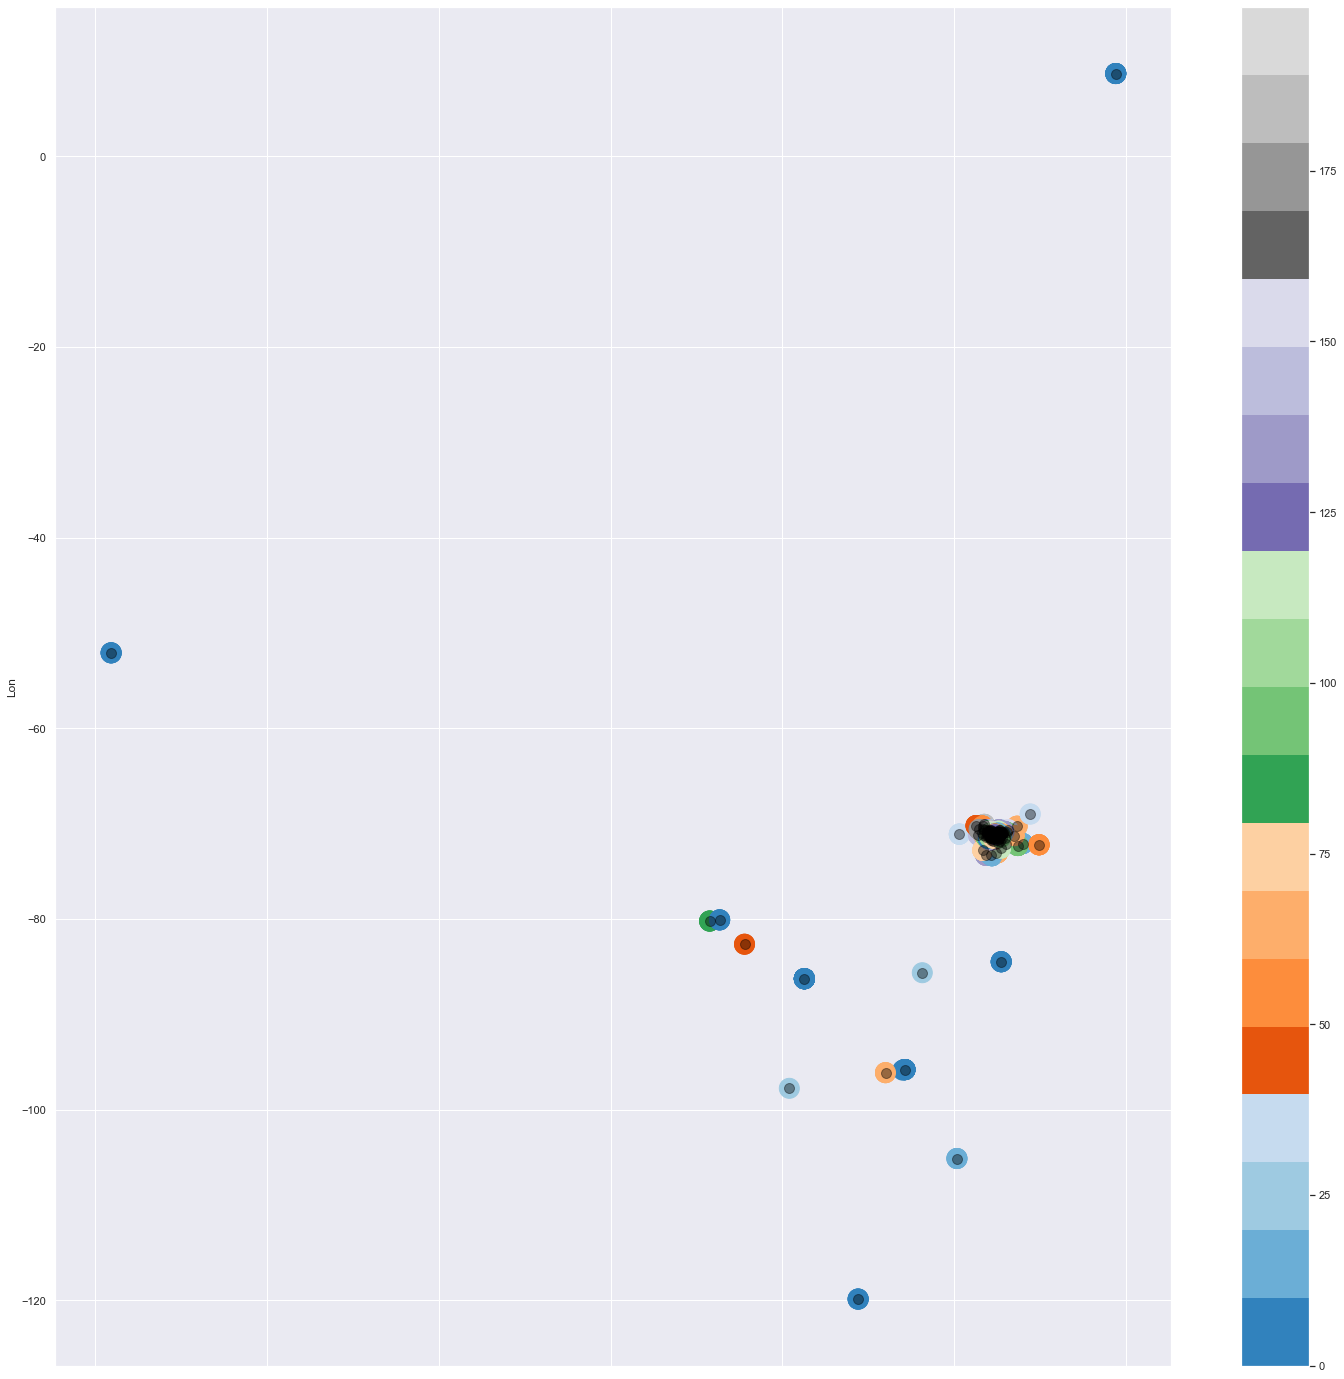

In [33]:
centers = kmeans.cluster_centers_
X.plot.scatter(x = 'Lat', y = 'Lon', c=id_label, s=400, cmap='tab20c',figsize=(25,25))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.4)

In [34]:
df['loc_grp']=id_label

In [35]:
print(df['loc_grp'].value_counts().loc[lambda x :x < 2])

22    1
27    1
Name: loc_grp, dtype: int64


In [36]:
df.to_csv("/Users/n.y.r/Desktop/Google_DL/RentalList_200.csv")

In [37]:
df.head(10)

,Unnamed: 0,id,location,ask,bedrooms,title,address,posting_date,created_at,updated_at,source_id,survey_id,payload,uid,last_seen,Lat,Lon,loc_grp
0,0,NaN,POINT (-71.048991 42.340629),3456.0,0,320 D St #435,NaN,2020-07-02 05:13:26,2020-07-08 17:20:08,2020-07-08 17:20:08,2,399,"{""listing_id"":40872337,""building_id"":null,""pb_...",40872337,2020-07-08 13:20:08,42.340629,-71.048991,145
1,1,NaN,POINT (-71.379407 42.305959),2877.0,2,3 Chrysler Rd,NaN,2020-07-08 12:19:24,2020-07-08 18:03:24,2020-07-08 18:03:24,2,399,"{""listing_id"":22918467,""building_id"":570647,""p...",22918467,2020-07-08 14:03:24,42.305959,-71.379407,144
2,2,NaN,POINT (-71.144526 42.029613),2570.0,2,60 Robert Dr,NaN,2020-07-08 11:41:36,2020-07-08 18:07:19,2020-07-08 18:07:19,2,399,"{""listing_id"":22917324,""building_id"":570610,""p...",22917324,2020-07-08 14:07:19,42.029613,-71.144526,165
3,3,NaN,POINT (-71.247362 42.368329),3340.0,3,70 Hope Ave,NaN,2020-07-08 16:16:13,2020-07-08 18:24:16,2020-07-08 18:24:16,2,399,"{""listing_id"":3114026,""building_id"":4983,""pb_i...",3114026,2020-07-08 14:24:16,42.368329,-71.247362,72
4,4,NaN,POINT (-71.138989 42.381782),2700.0,2,Standish St & Malcolm Rd #1,NaN,2020-06-11 08:33:54,2020-07-08 18:43:48,2020-07-08 18:43:48,2,399,"{""listing_id"":41597964,""building_id"":null,""pb_...",41597964,2020-07-08 14:43:48,42.381782,-71.138989,0
5,5,NaN,POINT (-71.129096 42.400394),3000.0,3,Yorktown St & Malvern Ave #1,NaN,2020-06-13 08:31:05,2020-07-08 18:45:06,2020-07-08 18:45:06,2,399,"{""listing_id"":41625380,""building_id"":null,""pb_...",41625380,2020-07-08 14:45:06,42.400394,-71.129096,129
6,6,NaN,POINT (-71.1271511137769 42.3976016378995),3330.0,3,Locke St & Massachusetts Ave #1,NaN,2020-06-20 08:31:15,2020-07-08 18:49:00,2020-07-08 18:49:00,2,399,"{""listing_id"":41680325,""building_id"":null,""pb_...",41680325,2020-07-08 14:49:00,42.397602,-71.127151,129
7,7,NaN,POINT (-71.127124 42.378932),2900.0,2,Craigie Cir & Craigie St #27,NaN,2020-06-20 08:31:02,2020-07-08 18:50:18,2020-07-08 18:50:18,2,399,"{""listing_id"":41705847,""building_id"":null,""pb_...",41705847,2020-07-08 14:50:18,42.378932,-71.127124,124
8,8,NaN,POINT (-71.130331 42.405225),2000.0,1,Broadway & Garrison Ave #3,NaN,2020-06-22 08:31:02,2020-07-08 18:51:36,2020-07-08 18:51:36,2,399,"{""listing_id"":41740122,""building_id"":null,""pb_...",41740122,2020-07-08 14:51:36,42.405225,-71.130331,115
9,9,NaN,POINT (-71.130792 42.384484),2700.0,2,Orrin St. & Garden St #3,NaN,2020-06-26 08:32:36,2020-07-08 18:52:54,2020-07-08 18:52:54,2,399,"{""listing_id"":41788232,""building_id"":null,""pb_...",41788232,2020-07-08 14:52:54,42.384484,-71.130792,124
